## Random Forest Model

In [89]:
import jenkspy as jenkspy
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('prepared_data.csv')
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
0,0.931846,0,1,2.500974,0.859059,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
1,1.673346,0,1,-0.056516,0.279850,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
2,-0.094846,0,0,1.303993,0.548264,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,1
3,1.616307,1,0,1.364196,-0.920950,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,1
4,1.730384,0,0,1.616050,-0.214597,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,-0.551154,0,0,-0.801661,-0.227499,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
4190,-0.608193,0,0,1.718958,0.345098,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4191,-0.323000,1,0,-0.283580,0.402209,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
4192,-0.608193,0,0,-0.514394,0.025377,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [91]:
train, test = train_test_split(df,test_size=0.2)
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,...,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,stroke
1243,-1.463769,0,0,-0.315036,0.039690,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
231,0.931846,0,0,-0.292121,-0.299359,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
2427,-1.520808,0,0,0.844449,-1.048093,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
1071,0.247384,1,0,-0.537933,1.946842,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3392,-1.634885,0,0,-0.605427,0.180960,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,-0.779308,0,0,0.199504,-0.977458,0,0,1,0,1,...,0,0,0,1,0,0,1,1,0,0
2688,-1.235616,0,0,0.204295,-0.807933,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3699,-0.037808,0,0,-0.160465,0.308104,1,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
3035,-0.437077,0,0,-0.703544,-0.511265,0,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0


<AxesSubplot:>

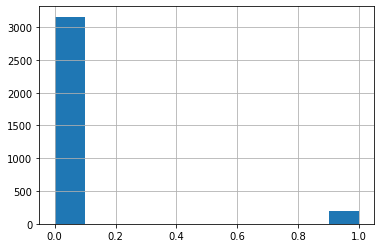

In [92]:
train['stroke'].hist()

### stroke = 1 <<<< stroke =0 => need to add

<AxesSubplot:title={'center':'count (Stroke)'}>

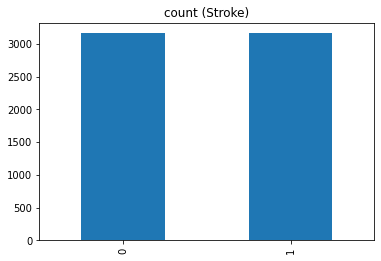

In [93]:
class_count_1, class_count_2 = train['stroke'].value_counts()
#seprate 2 classes of Outcome
class_1 = train[train['stroke'] == 0]
class_2 = train[train['stroke'] == 1]# print the shape of the class
#print('class 1:', class_1.shape)
#print('class 2:', class_2.shape)
class_2_over = class_2.sample(class_count_1, replace=True)
test_over = pd.concat([class_2_over, class_1], axis=0)
#print("total Outcome of 1 and 2:",test_over['Outcome'].value_counts())# plot the count after under-sampeling
test_over['stroke'].value_counts().plot(kind='bar', title='count (Stroke)')

In [94]:
y_train=test_over['stroke']
x_train=test_over.drop(columns='stroke')
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
196,0.988884,0,0,2.133714,1.240489,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
30,1.331115,0,0,2.314115,0.449374,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0
206,1.388153,0,0,-0.621468,-0.172216,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0
66,1.616307,0,0,-0.410652,-1.076347,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0
124,0.361461,1,0,-0.858739,0.336358,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,-0.779308,0,0,0.199504,-0.977458,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0
2688,-1.235616,0,0,0.204295,-0.807933,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
3699,-0.037808,0,0,-0.160465,0.308104,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
3035,-0.437077,0,0,-0.703544,-0.511265,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1


<AxesSubplot:>

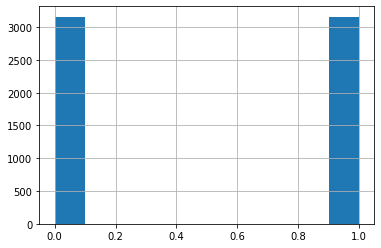

In [95]:
y_train.hist()

In [96]:
y_test=test['stroke']
x_test=test.drop(columns='stroke')
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
464,-1.349693,0,0,0.128260,0.209214,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1
1971,0.076269,0,0,2.007475,-0.059200,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
56,1.673346,1,0,-0.749165,-0.228724,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0
3330,-0.950423,0,0,-0.452315,-1.203491,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
4016,1.559269,0,1,2.316615,0.035120,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,1.102961,1,0,0.801744,-1.161110,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
752,0.703692,0,0,-0.257749,0.180960,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
249,0.418500,0,0,-0.298579,-0.200470,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
1363,0.361461,0,0,-0.801452,-0.666663,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0


## Examine max_depth

In [97]:
accuracy_list = []
for i in range(1,15):
    DT = RandomForestClassifier(n_estimators=100,max_depth=i,
                               criterion="entropy", random_state=0).fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred)*100)

accuracy_list

[66.98450536352802,
 66.746126340882,
 67.34207389749702,
 71.39451728247914,
 75.56615017878427,
 77.1156138259833,
 79.14183551847438,
 82.00238379022646,
 85.57806912991657,
 87.60429082240762,
 89.27294398092968,
 90.70321811680571,
 91.17997616209773,
 91.77592371871275]

## As expected, 15 is the best but it leads to over fit so i choose 10

In [98]:
model = RandomForestClassifier(n_estimators=100,max_depth=10,
                               criterion="entropy", random_state=40).fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)
print('accuracy_score for y test and predict: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred)))

accuracy_score for y test and predict: 0.877


In [99]:
print('acc for training data: {:.3f}'.format(model.score(x_train, y_train)))
print('acc for test data: {:.3f}'.format(model.score(x_test, y_test)))

acc for training data: 0.965
acc for test data: 0.877


In [100]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[722  66]
 [ 37  14]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       788
           1       0.17      0.27      0.21        51

    accuracy                           0.88       839
   macro avg       0.56      0.60      0.57       839
weighted avg       0.90      0.88      0.89       839

